## Association Rule Learning Homework

*Prepared by:*
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

---

Submitted by:
- Guerra, Jose Maria Angelo
- Hinolan, Charles Joseph
- Lasala, Kyle Carlo
- Lorenzo, Antonio Jose Maria
- Roco, Katrina Bianca

## Requirements

Answer the following questions:

**Groceries Dataset**  
1. Calculate the association rules and find the `significant/interesting` items in this dataset. Feel free to use any threshold value. (10 pts)
    - group the items by member
    - group the items by month
2. What would you recommend to the owner of a grocery store given these association rules? (15 pts)
3. Is there any other grouping that could give us high confidence/interest? (10 pts)

**Another Dataset**  
1. Find another dataset that can be turned into an association rule learning problem. Ideally, more than 1000 transactions/records. This does not have to be grocery-related. (20 pts)
2. Similar to the grocery dataset, calculate the association rules and find the `significant/interesting` items. (10 pts)
3. What would you recommend given the association rules? (25 pts)
4. Any other learning?

Note:
 - You have to create a writeup on the code you've written. Make sure that the code is clean as well. (5 pts)
 - Cite references if there are any. If you will be using the code I've given, cite it. If you got help from your peers, cite it as well. (5 pts)
 - Submit the link for your copy of this Google Colaboratory notebook. **Make sure it's public**. You may use incognito to see if the link is accessible.

<hr>

## Grading Criteria

|Criteria|Points|
|---|---|
|Groceries Dataset Analysis|35|
|Another Dataset Analysis|55|
|Code Cleanliness|5|
|References|5|


## Preliminaries

### Import libraries

We will be using the `PyFIM` library to do association rule learning in this homework. If this is not already installed in your environment, you may use the either of the following commands in your command line:

```conda install -c conda-forge pyfim``` or
```pip install pyfim```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fim import arules, apriori, fpgrowth

### Prepare the dataset

We will be utilizing the <a href="https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset">Groceries dataset</a> from Kaggle.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Cyntwikip/data-repository/main/groceries.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## Data Preprocessing

In [3]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [5]:
# checking items
unique_items = df['itemDescription'].unique()
print("Number of Unique Items:", len(unique_items))
print(sorted(unique_items))

Number of Unique Items: 167
['Instant food products', 'UHT-milk', 'abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder', 'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'butter milk', 'cake bar', 'candles', 'candy', 'canned beer', 'canned fish', 'canned fruit', 'canned vegetables', 'cat food', 'cereals', 'chewing gum', 'chicken', 'chocolate', 'chocolate marshmallow', 'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk', 'cooking chocolate', 'cookware', 'cream', 'cream cheese ', 'curd', 'curd cheese', 'decalcifier', 'dental care', 'dessert', 'detergent', 'dish cleaner', 'dishes', 'dog food', 'domestic eggs', 'female sanitary products', 'finished products', 'fish', 'flour', 'flower (seeds)', 'flower soil/fertilizer', 'frankfurter', 'frozen chicken', 'frozen dessert', 'frozen fish', 'frozen fruits', 'frozen meals', 'frozen potato products', 'frozen vegeta

Grouped the items by `Member_number` and `Date` 

In [6]:
df_grouped = df.groupby(['Member_number','Date']).agg(list)
df_grouped.sort_values(['Member_number', 'Date'], inplace=True)
df_grouped

itemDescription
Member_number Date                                                         
1000          2014-06-24                  [whole milk, pastry, salty snack]
              2015-03-15  [sausage, whole milk, semi-finished bread, yog...
              2015-05-27                         [soda, pickled vegetables]
              2015-07-24                     [canned beer, misc. beverages]
              2015-11-25                        [sausage, hygiene articles]
...                                                                     ...
4999          2015-05-16                  [butter milk, whipped/sour cream]
              2015-12-26                             [bottled water, herbs]
5000          2014-03-09                    [fruit/vegetable juice, onions]
              2014-11-16                   [bottled beer, other vegetables]
              2015-02-10       [soda, root vegetables, semi-finished bread]

[14963 rows x 1 columns]

In [7]:
# convert to list format
transactions = df_grouped['itemDescription'].to_list()
transactions

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['dish cleaner', 'cling film/bags'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'shopping bags'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'hygiene

## Association Rule Learning

### Frequent Itemset Mining

In [8]:
# calculates the frequent itemset using fpgrowth algorithm
def get_fim(supp, transactions):
    result = fpgrowth(transactions, supp=supp, report='as')
    colnames = ['itemset'] + ['support_absolute', 'support_relative']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

Checking for ideal support threshold

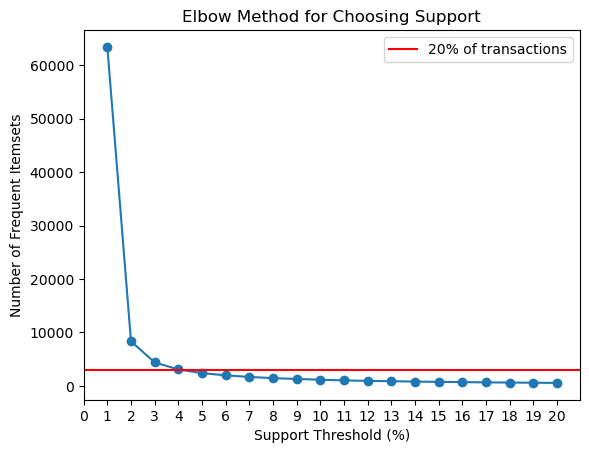

In [9]:
supports = range(1, 21)  # Test supports from 1% to 20%
num_itemsets = []

for supp in supports:
    rules = get_fim(supp*-1, transactions)
    num_itemsets.append(len(rules))

plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

Zoom in the Plot

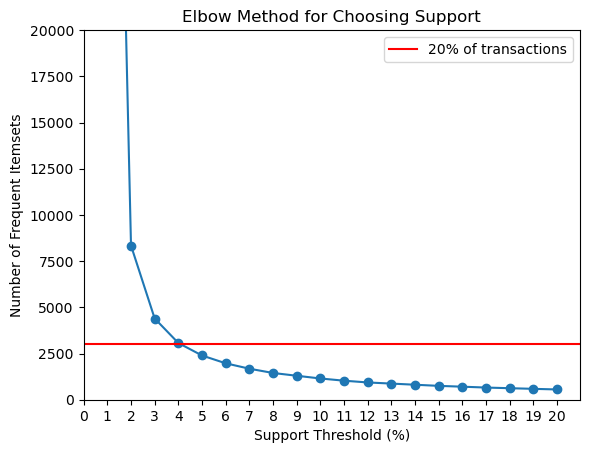

In [10]:
plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.ylim([0,20000])
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

Support Threshold is obtained through the **elbow method** (inspired from KMeans Clustering) to generate *enough* rules and avoid *noise*. <br/>
Ideally we want to be approximately equal to 20% of the transactions (represented by the redline) and not very steep nor flat at the given point so that we avoid the exteremely rare and extremely common itemsets. <br/>
***Support Threshold is set to 4.***

Get the Frequent Itemsets given that Support Threshold is set to 4

In [11]:
get_fim(-4, transactions)

,itemset,support_absolute,support_relative
0,"(whole milk,)",2363,0.157923
2,"(other vegetables,)",1827,0.122101
6,"(rolls/buns,)",1646,0.110005
13,"(soda,)",1453,0.097106
24,"(yogurt,)",1285,0.085879
...,...,...,...
1635,"(meat, waffles)",4,0.000267
250,"(shopping bags, pip fruit, rolls/buns)",4,0.000267
602,"(butter, pastry, other vegetables)",4,0.000267
1280,"(salty snack, yogurt, whole milk)",4,0.000267


### Significant Itemsets

In [14]:
# calculates the frequent itemset using fpgrowth algorithm
def get_sig(supp, conf, transactions):
    
    result = arules(transactions, supp=supp, conf=conf, report='asc')
    colnames = ['consequent', 'antecedent'] + ['support_absolute', 'support_relative', 'confidence_pct']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

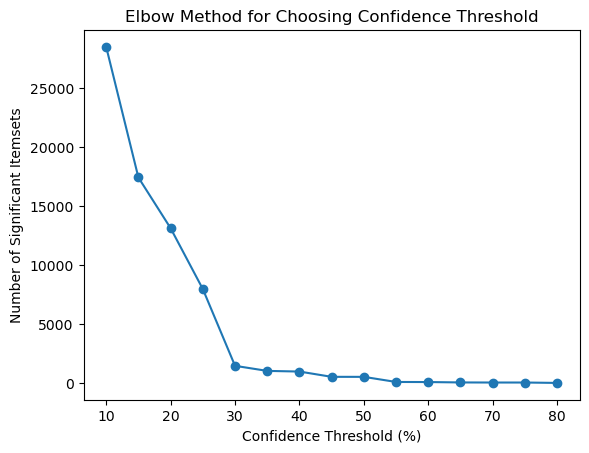

In [18]:
confidence = range(10, 81, 5)  # Test supports from 1% to 20%
num_itemsets = []

for conf in confidence:
    rules = get_sig(-4, conf, transactions)
    num_itemsets.append(len(rules))

plt.plot(confidence, num_itemsets, marker='o')
plt.xlabel("Confidence Threshold (%)")
plt.ylabel("Number of Significant Itemsets")
plt.title("Elbow Method for Choosing Confidence Threshold")
plt.show()

In [19]:
get_sig(-4, 30, transactions)

,consequent,antecedent,support_absolute,support_relative,confidence_pct
1418,whole milk,"(brandy,)",13,0.000869,0.342105
230,whole milk,"(pork, sausage)",9,0.000601,0.391304
348,whole milk,"(beef, whipped/sour cream)",7,0.000468,0.333333
249,other vegetables,"(pork, citrus fruit)",7,0.000468,0.350000
601,whole milk,"(sugar, other vegetables)",7,0.000468,0.368421
...,...,...,...,...,...
562,rolls/buns,"(onions, UHT-milk)",2,0.000134,0.400000
561,whole milk,"(onions, UHT-milk)",2,0.000134,0.400000
559,bottled water,"(onions, margarine)",2,0.000134,0.500000
558,onions,"(margarine, bottled water, other vegetables)",2,0.000134,0.400000


**Groceries Dataset**  
1. Calculate the association rules and find the `significant/interesting` items in this dataset. Feel free to use any threshold value. (10 pts)
    - group the items by member
    - group the items by month
2. What would you recommend to the owner of a grocery store given these association rules? (15 pts)
    - The owner of the grocery store can use the association rules to determine which items are frequently bought together. In this case, we recommend that the store place the following items near each other to encourage customers to buy them together (top 3):
        - whole milk and brandy
        - whole milk and meat (pork/sausage)
        - whole milk with whipped/sour cream and beef

3. Is there any other grouping that could give us high confidence/interest? (10 pts)
    - Another grouping that could give us high confidence/interest is grouping the items by day. This will allow the store to determine which items are frequently bought together on a daily basis.

## Grocery Dataset Association Rule by Day

In [29]:
#Create day column
df['Day'] = df['Date'].dt.day_name()
df


,Member_number,Date,itemDescription,Day
0,1808,2015-07-21,tropical fruit,Tuesday
1,2552,2015-01-05,whole milk,Monday
2,2300,2015-09-19,pip fruit,Saturday
3,1187,2015-12-12,other vegetables,Saturday
4,3037,2015-02-01,whole milk,Sunday
...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,Wednesday
38761,2022,2014-02-23,candy,Sunday
38762,1097,2014-04-16,cake bar,Wednesday
38763,1510,2014-12-03,fruit/vegetable juice,Wednesday


In [30]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   Day              38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


In [31]:
df_grouped = df.groupby(['Member_number','Day']).agg(list)
df_grouped.sort_values(['Member_number', 'Day'], inplace=True)
df_grouped

Date  \
Member_number Day                                                            
1000          Friday            [2015-07-24 00:00:00, 2015-07-24 00:00:00]   
              Sunday     [2015-03-15 00:00:00, 2015-03-15 00:00:00, 201...   
              Tuesday    [2014-06-24 00:00:00, 2014-06-24 00:00:00, 201...   
              Wednesday  [2015-05-27 00:00:00, 2015-11-25 00:00:00, 201...   
1001          Friday     [2014-02-07 00:00:00, 2014-12-12 00:00:00, 201...   
...                                                                    ...   
4999          Monday            [2014-05-19 00:00:00, 2014-05-19 00:00:00]   
              Saturday   [2015-12-26 00:00:00, 2015-05-16 00:00:00, 201...   
              Wednesday  [2015-02-18 00:00:00, 2014-04-09 00:00:00, 201...   
5000          Sunday     [2014-11-16 00:00:00, 2014-03-09 00:00:00, 201...   
              Tuesday    [2015-02-10 00:00:00, 2015-02-10 00:00:00, 201...   

                                                           itemDescription  
Member_number Day                                                           
1000          Friday                        [canned beer, misc. beverages]  
              Sunday     [sausage, whole milk, semi-finished bread, yog...  
              Tuesday                    [whole milk, pastry, salty snack]  
              Wednesday  [soda, sausage, pickled vegetables, hygiene ar...  
1001          Friday     [sausage, whole milk, whole milk, soda, rolls/...  
...                                                                    ...  
4999          Monday                         [other vegetables, detergent]  
              Saturday   [bottled water, butter milk, tropical fruit, b...  
              Wednesday  [berries, semi-finished bread, onions, newspap...  
5000          Sunday     [bottled beer, fruit/vegetable juice, other ve...  
              Tuesday         [soda, root vegetables, semi-finished bread]  

[11560 rows x 2 columns]

In [32]:
transactions = df_grouped['itemDescription'].to_list()
transactions

[['canned beer', 'misc. beverages'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['soda', 'sausage', 'pickled vegetables', 'hygiene articles'],
 ['sausage', 'whole milk', 'whole milk', 'soda', 'rolls/buns'],
 ['frankfurter', 'curd'],
 ['frankfurter', 'beef', 'soda', 'white bread', 'whipped/sour cream'],
 ['butter', 'whole milk'],
 ['tropical fruit',
  'butter milk',
  'frozen vegetables',
  'sugar',
  'specialty chocolate',
  'other vegetables'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'shopping bags', 'dish cleaner', 'cling film/bags'],
 ['pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine',
  'tropical fruit',
  'chocolate',
  'pastry'],
 ['other vegetables', 'hygi

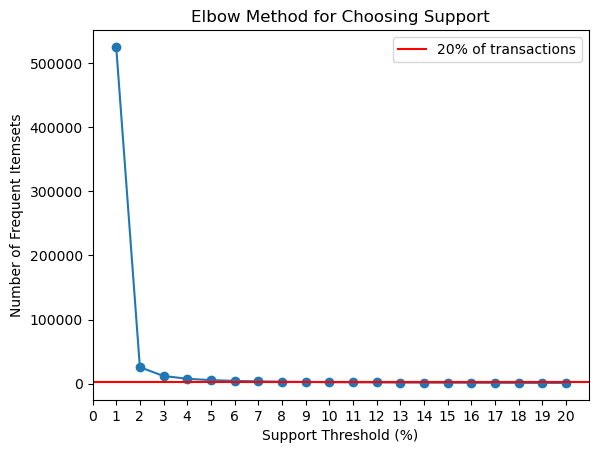

In [33]:
supports = range(1, 21)  # Test supports from 1% to 20%
num_itemsets = []

for supp in supports:
    rules = get_fim(supp*-1, transactions)
    num_itemsets.append(len(rules))

plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

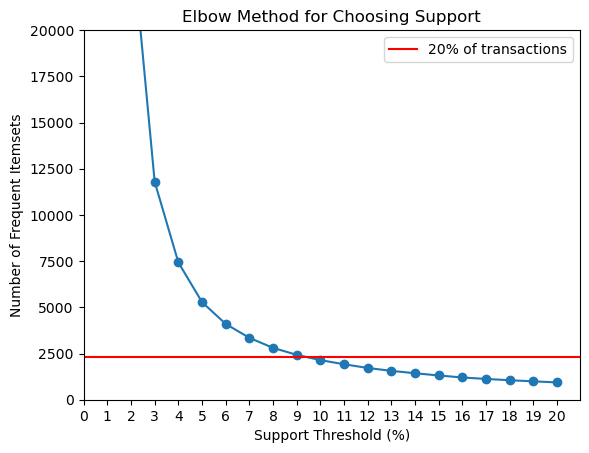

In [34]:
plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.ylim([0,20000])
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

In [35]:
get_fim(-9, transactions)

,itemset,support_absolute,support_relative
0,"(whole milk,)",2253,0.194896
2,"(other vegetables,)",1771,0.153201
6,"(rolls/buns,)",1595,0.137976
13,"(soda,)",1411,0.122059
25,"(yogurt,)",1258,0.108824
...,...,...,...
1970,"(soft cheese, whipped/sour cream)",9,0.000779
1966,"(soft cheese, citrus fruit)",9,0.000779
1964,"(soft cheese, tropical fruit)",9,0.000779
1961,"(soft cheese, yogurt, other vegetables)",9,0.000779


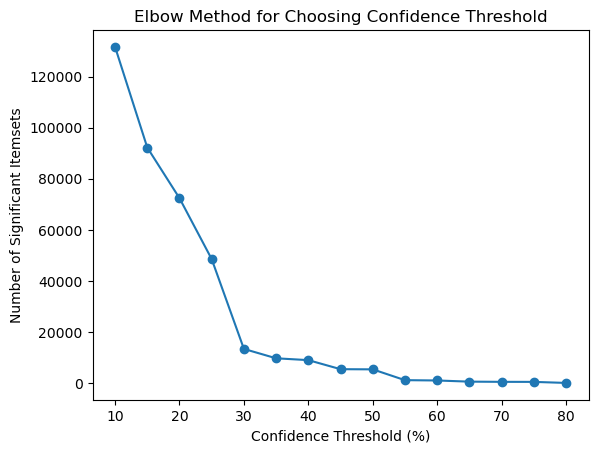

In [36]:
confidence = range(10, 81, 5)  # Test supports from 1% to 20%
num_itemsets = []

for conf in confidence:
    rules = get_sig(-4, conf, transactions)
    num_itemsets.append(len(rules))

plt.plot(confidence, num_itemsets, marker='o')
plt.xlabel("Confidence Threshold (%)")
plt.ylabel("Number of Significant Itemsets")
plt.title("Elbow Method for Choosing Confidence Threshold")
plt.show()

In [37]:
get_sig(-9, 30, transactions)

,consequent,antecedent,support_absolute,support_relative,confidence_pct
24,whole milk,"(sausage, yogurt)",42,0.003633,0.344262
59,whole milk,"(pastry, rolls/buns)",33,0.002855,0.343750
58,whole milk,"(pastry, other vegetables)",31,0.002682,0.310000
65,whole milk,"(pastry, yogurt)",27,0.002336,0.333333
120,whole milk,"(pip fruit, yogurt)",26,0.002249,0.333333
...,...,...,...,...,...
1116,other vegetables,"(butter milk, soda, whole milk)",3,0.000260,0.300000
1117,rolls/buns,"(butter milk, soda, whole milk)",3,0.000260,0.300000
1118,soda,"(butter milk, rolls/buns, whole milk)",3,0.000260,0.300000
1120,rolls/buns,"(butter milk, yogurt, whole milk)",3,0.000260,0.300000


## Writeup/Analysis

Refer to the **Requirements section** for the guide questions.

## References

- sir jude
- 

## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>